<a href="https://colab.research.google.com/github/phmouras/Projeto_Pos/blob/main/tst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt


N = 100

L0 = 1

col = np.cos(np.arange(N)*math.pi / N)

T = np.zeros([N,N])

T[0,] = 1
T[1,] = col

for i in (range(2,N)):
  T[i,] = 2*col*T[i-1,] - T[i-2,]

f = np.exp(- L0 * np.arctanh(col)**2)      ### Função para ajustar f = arcsin(eta)

Coef = np.dot( f, np.linalg.inv(T))


u_ap = np.dot(Coef, T)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in arctanh


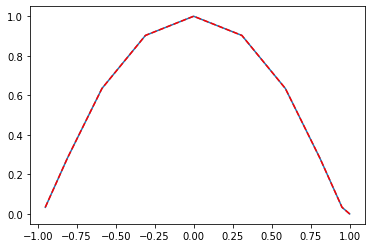

In [45]:
plt.plot(col, f, col, u_ap, '--r')
plt.show()
